In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig

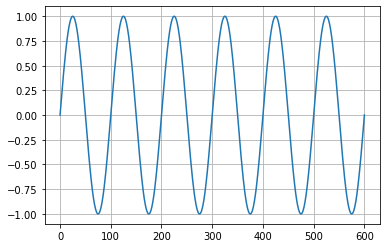

In [72]:
N = 601
t = np.arange(n)
Omg = 0.02*np.pi
#Original Signal
x = np.sin(Omg*t) # Witness chanal (Chanel A)
plt.plot(t,x)
plt.grid()

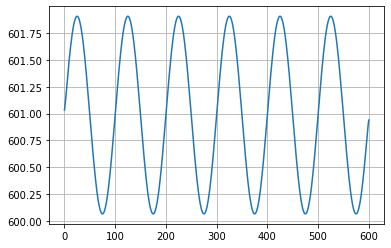

In [119]:
#Observed Signal
g = (1/27)*np.asarray([1,2,3,4,5,4,3,2,1])
n = np.random.normal(N,np.sqrt(0.3))
y = np.convolve(x,g,mode='same')+n #Chanal B
plt.plot(t,y)
plt.grid()

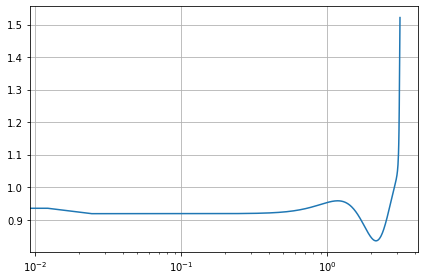

In [120]:
# Wiener Filter
f,Pxx = sig.csd(x,x,nperseg = 514)
f,Pyx = sig.csd(y,x,nperseg = 514)
H = Pyx/Pxx
H = H*np.exp(-1j*np.pi/len(H)*np.arange(len(H))*(len(H)//2))
h = np.fft.irfft(H)
OP_y = np.convolve(y,h,mode='same')
t1 = np.linspace(0,np.pi,num=len(H))
p = np.abs(H)
dB = 20*np.log(p)
plt.semilogx(t1,p)
plt.grid()
plt.tight_layout()
              

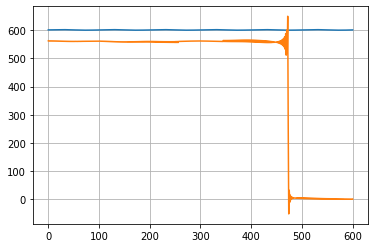

In [129]:
# Comparison Plots
plt.plot(t,y)
plt.plot(t,OP_y)
plt.grid()